# Statistics

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from collections import Counter

## Import Data

In [2]:
data_path = "../na_mentions_final/"
data_folders = sorted([folder for folder in os.listdir(data_path)])
output_path = "data/"

In [3]:
data_folders

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20']

In [4]:
list00 = []
for folder in data_folders[:1]:
    files = [file for file in os.listdir(os.path.join(data_path, folder))]
    print(files)

    for file in files:
        df = pd.read_json(os.path.join(data_path, folder, file))
        print(len(df))
        list00.append(df)

['1_4.jsonl.bz2', '7_5.jsonl.bz2', '5_2.jsonl.bz2', '3_4.jsonl.bz2', '1_7.jsonl.bz2', '8_5.jsonl.bz2', '1_8.jsonl.bz2', '4_4.jsonl.bz2', '6_1.jsonl.bz2', '4_6.jsonl.bz2', '0_0.jsonl.bz2', '3_2.jsonl.bz2', '1_5.jsonl.bz2', '4_5.jsonl.bz2', '6_8.jsonl.bz2', '5_8.jsonl.bz2', '0_7.jsonl.bz2', '9_2.jsonl.bz2', '5_4.jsonl.bz2', '8_2.jsonl.bz2', '3_6.jsonl.bz2', '0_4.jsonl.bz2', '2_2.jsonl.bz2', '2_0.jsonl.bz2', '5_3.jsonl.bz2', '4_2.jsonl.bz2', '0_9.jsonl.bz2', '3_5.jsonl.bz2', '4_8.jsonl.bz2', '6_3.jsonl.bz2', '2_5.jsonl.bz2', '1_3.jsonl.bz2', '8_3.jsonl.bz2', '4_3.jsonl.bz2', '8_7.jsonl.bz2', '5_0.jsonl.bz2', '9_4.jsonl.bz2', '8_8.jsonl.bz2', '2_7.jsonl.bz2', '3_3.jsonl.bz2', '0_3.jsonl.bz2', '1_9.jsonl.bz2', '3_0.jsonl.bz2', '2_8.jsonl.bz2', '0_8.jsonl.bz2', '2_4.jsonl.bz2', '1_2.jsonl.bz2', '9_9.jsonl.bz2', '2_9.jsonl.bz2', '5_6.jsonl.bz2', '4_9.jsonl.bz2', '9_8.jsonl.bz2', '0_2.jsonl.bz2', '1_0.jsonl.bz2', '2_6.jsonl.bz2', '9_7.jsonl.bz2', '9_1.jsonl.bz2', '8_4.jsonl.bz2', '7_6.jsonl.bz

3112
3047
2997
3000
3015
2841
2758
2925
2871
2803
2934
2865
3142
3011
2902
3033
3031
2992
3149
3081
3153
3111
2983
3132
3037
2702
2941
2963
2728
2969
2987
2832
2866
3110
2820
2849
2890
3019
2801
2934
2826
2758
3030
2884
2776
2786
2825
2938
2991
2960
2955
2812
3031
2869
3066
2799
2915
3102
2798
3061
2868
2807
2822
2841
2984
2945
2768
2897
2946
2860
2920
3034
2863
2970
2945
2837
3020
2831
2903
2875
2900
2895
2671
2988
2841
2856
2724
2977
3112
2979
3060
2912
2949
2929
2863
3096


### Importing Everything

In [5]:
list_all = []

for folder in data_folders:
    files = [file for file in os.listdir(os.path.join(data_path, folder))]
    
    print(f"Number of files contained in folder {folder}:", len(files))

    for file in files:
        df = pd.read_json(os.path.join(data_path, folder, file))
        list_all.append(df)

mentions_all = pd.concat(list_all, axis=0, ignore_index=True)

#dropping articleauthor
len_before = len(mentions_all)
mentions_all = mentions_all[mentions_all['entity'] != "pers.ind.articleauthor"]
print(f"Dropped {len_before - len(mentions_all)} rows which contain pers.ind.articleauthor mention")

#infer new columns
mentions_all['split_id'] = mentions_all['id'].str.split("-")
mentions_all['article'] = mentions_all['id'].apply(lambda x: x.split(":")[0])
mentions_all['newspaper'] = mentions_all['split_id'].apply(lambda x: x[0])
mentions_all['date'] = mentions_all['split_id'].apply(lambda x: "-".join(x[1:4]))
mentions_all['year'] = mentions_all['split_id'].apply(lambda x: x[1]).astype(int)
mentions_all['decade'] = mentions_all['year'] // 10 * 10
mentions_all['agency'] = mentions_all['entity'].str.replace("org.ent.pressagency.", "", regex=False)
mentions_all['language'] = mentions_all['id'].apply(lambda x: x[-2:])
#newspapers from Switzerland are uppercase, from Luxembourg lowercase
mentions_all['country'] = ["CH" if entry.isupper() else "LU" for entry in mentions_all['newspaper']]
#correct typo
#mentions_all['agency'] = mentions_all['agency'].str.replace("ATB", "ATS", regex=False)
mentions_all = mentions_all.drop(columns='split_id')

Number of files contained in folder 00: 100
Number of files contained in folder 01: 100
Number of files contained in folder 02: 100
Number of files contained in folder 03: 100
Number of files contained in folder 04: 100
Number of files contained in folder 05: 100
Number of files contained in folder 06: 100
Number of files contained in folder 07: 100
Number of files contained in folder 08: 100
Number of files contained in folder 09: 100
Number of files contained in folder 10: 100
Number of files contained in folder 11: 100
Number of files contained in folder 12: 100
Number of files contained in folder 13: 100
Number of files contained in folder 14: 100
Number of files contained in folder 15: 100
Number of files contained in folder 16: 100
Number of files contained in folder 17: 100
Number of files contained in folder 18: 100
Number of files contained in folder 19: 100
Number of files contained in folder 20: 100
Dropped 237520 rows which contain pers.ind.articleauthor mention


In [6]:
mentions_all.head()

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
0,org.ent.pressagency.Havas,Havas,Q2826560,30,35,1,84,89,LLE-1939-11-27-a-i0076:1:30:35:84:89:newsag:be...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,Havas,fr,CH
1,org.ent.pressagency.UP-UPI,United Press,Q493845,2,14,7,595,607,LLE-1939-11-27-a-i0076:7:2:14:595:607:newsag:b...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH
2,org.ent.pressagency.UP-UPI,United Press,Q493845,0,12,10,1364,1376,LLE-1939-11-27-a-i0076:10:0:12:1364:1376:newsa...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH
3,org.ent.pressagency.UP-UPI,United Press,Q493845,2,14,16,2181,2193,LLE-1939-11-27-a-i0076:16:2:14:2181:2193:newsa...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH
4,org.ent.pressagency.UP-UPI,Press,Q493845,48,53,18,2531,2536,LLE-1939-11-27-a-i0076:18:48:53:2531:2536:news...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH


In [7]:
print(f"Languages in corpus: {mentions_all['language'].unique()}")
mentions_fr = mentions_all[mentions_all['language']=="fr"]
mentions_de = mentions_all[mentions_all['language']=="de"]

Languages in corpus: ['fr' 'de']


In [8]:
articles = mentions_all.groupby(['article']).agg({
    'agency': list,
    'surface': list,
    'id': list,
    'sentence_idx:': list,
    'language': 'first',
    'newspaper': 'first',
    'country': 'first',
    'year': 'first',
    'decade': 'first',
}).reset_index()

articles_fr = articles[articles['language']=="fr"]
articles_de = articles[articles['language']=="de"]

In [9]:
articles.head()

,article,agency,surface,id,sentence_idx:,language,newspaper,country,year,decade
0,BLB-1846-03-28-a-i0002,[Reuters],[Reuel],[BLB-1846-03-28-a-i0002:88:0:5:13580:13585:new...,[88],de,BLB,CH,1846,1840
1,BLB-1846-10-10-a-i0003,[Havas],[Saas],[BLB-1846-10-10-a-i0003:49:0:4:6901:6905:newsa...,[49],de,BLB,CH,1846,1840
2,BLB-1847-02-13-a-i0001,[unk],[pp],[BLB-1847-02-13-a-i0001:168:0:2:13072:13074:ne...,[168],de,BLB,CH,1847,1840
3,BLB-1847-05-22-a-i0003,[SPK-SMP],[sp],[BLB-1847-05-22-a-i0003:37:0:2:2653:2655:newsa...,[37],de,BLB,CH,1847,1840
4,BLB-1847-07-03-a-i0001,[SPK-SMP],[resp],[BLB-1847-07-03-a-i0001:11:40:44:3285:3289:new...,[11],de,BLB,CH,1847,1840


In [10]:
#divide by country
mentions_ch = mentions_all[mentions_all['country'] == 'CH']
mentions_lu = mentions_all[mentions_all['country'] == 'LU']

articles_ch = articles[articles['country'] == 'CH']
articles_lu = articles[articles['country'] == 'LU']

## Basic Stats

In [11]:
print(f"Total number of agency mentions: {len(mentions_all)}")
print(f"Total number of articles with agency mentions: {len(articles)}\n")

print(f"FR - #mentions: {len(mentions_fr)}")
print(f"FR - #articles: {len(articles_fr)}\n")

print(f"DE - #mentions: {len(mentions_de)}")
print(f"DE - #articles: {len(articles_de)}\n")

print(f"CH - #mentions: {len(mentions_ch)}")
print(f"CH - #articles: {len(articles_ch)}\n")

print(f"LU - #mentions: {len(mentions_lu)}")
print(f"LU - #articles: {len(articles_lu)}")

Total number of agency mentions: 4482890
Total number of articles with agency mentions: 2406634

FR - #mentions: 2853727
FR - #articles: 1754146

DE - #mentions: 1629163
DE - #articles: 652488

CH - #mentions: 4326729
CH - #articles: 2291218

LU - #mentions: 156161
LU - #articles: 115416


In [12]:
#specify decades
decades = sorted(articles['decade'].unique())
relevant_decs = list(range(1840, 2010, 10))

<AxesSubplot: title={'center': '#articles per decade'}, ylabel='Frequency'>

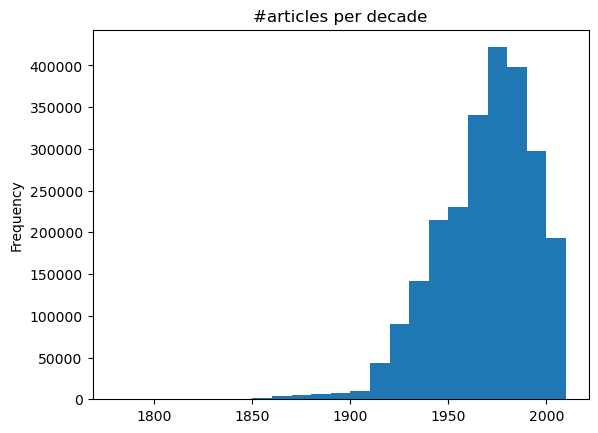

In [13]:
articles['decade'].plot.hist(bins=decades, title="#articles per decade")

<AxesSubplot: title={'center': '#articles per decade (1840-2000)'}, ylabel='Frequency'>

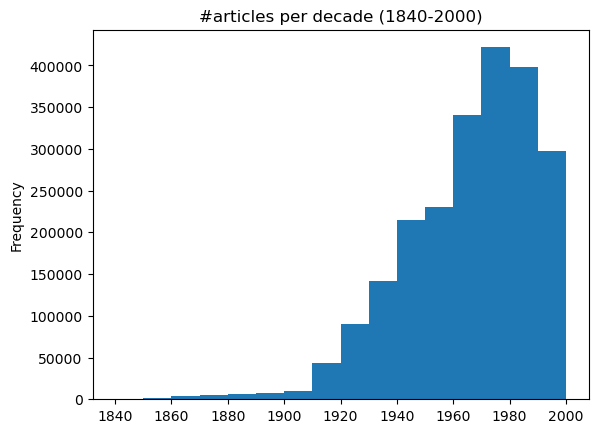

In [14]:
articles.loc[articles['decade'].isin(relevant_decs[:-1]), 'decade'].plot.hist(bins=relevant_decs, title="#articles per decade (1840-2000)")

<AxesSubplot: title={'center': '#mentions per decade'}, ylabel='Frequency'>

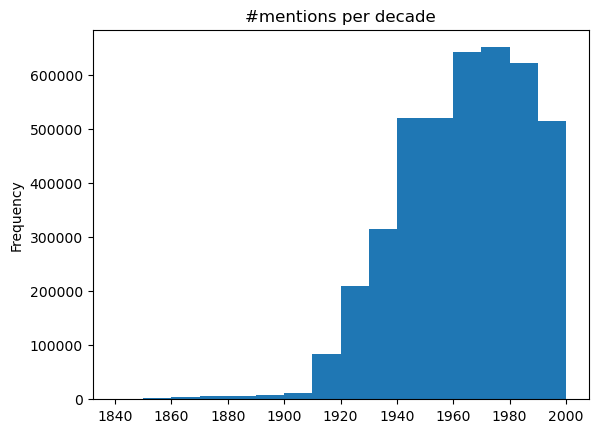

In [15]:
mentions_all.loc[mentions_all['decade'].isin(relevant_decs[:-1]), 'decade'].plot.hist(bins=relevant_decs, title="#mentions per decade")

In [51]:
#import frequencies of articles in impresso per year
all_impresso_art_page = pd.read_csv(output_path + "counts_impresso_yearly_page-art.csv", delimiter=";", usecols=['Year', 'Number ar + page']).rename(
    columns={'Year': 'year', 'Number ar + page':'count'})
all_impresso_art_page = all_impresso_art_page.sort_values(by='year')
all_impresso_art_page1820 = all_impresso_art_page[all_impresso_art_page['year'] >= 1820]
all_impresso_art_page.tail()

,year,count
245,2014,72514
246,2015,68400
247,2016,72246
248,2017,64434
249,2018,1828


In [49]:
#Pauline's code

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def get_c_per_year(year, colors = colors, sep = 10):
    # change color every sep years to visualize better
    return colors[(year // sep)%len(colors)]

def img_bar_plot(df, ax, xticks, title, log_scale = False, colors_sep=10, overlay_df = None):
    '''Display the yearly counts in df using a bar plot.
    
    df (DataFrame): data to be displayed, should include a col named 'year' and another called 'count'
    ax : figure axis to use for plotting, allows to construct subplots if needed
    xticks (iterator or list): range for ticks along x axis
    log_scale (bool): if True the counts will be displayed with a logarithmic scale for the y-axis
    colors_sep (int): number of years between color changes
    overlay_df (DataFrame): if not None, will display overlay_df's counts with reduced opacity.
    '''
    # get the colors for each years 
    colors = [get_c_per_year(y, sep=colors_sep) for  y in df['year']]
    
    # plot the counts
    ax.bar(df['year'], df['count'], color=colors)
    if(overlay_df is not None):
        # if overlay_df, add second set of counts
        ax.bar(df['year'], overlay_df['count'], color=colors, alpha=0.2)
    ax.set_xticks(xticks)
    if(log_scale):
        ax.set_yscale('log')
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

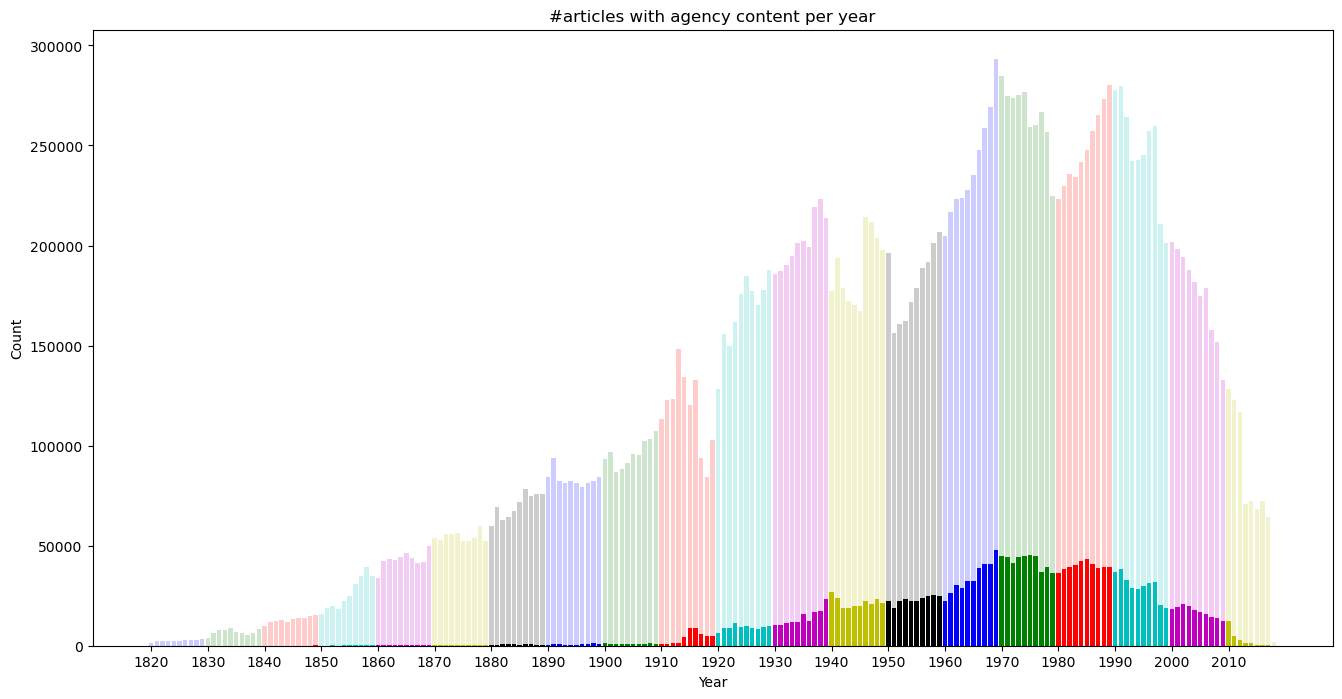

In [52]:
na_per_year = articles[['article', 'year']].groupby('year').count().reset_index().rename(columns={'article': 'count'})
na_per_year1820 = na_per_year[na_per_year['year']>=1820]

f, ax = plt.subplots(1, figsize=(16,8))
img_bar_plot(na_per_year1820, ax, range(1820, 2019, 10), title="#articles with agency content per year", overlay_df=all_impresso_art_page1820)

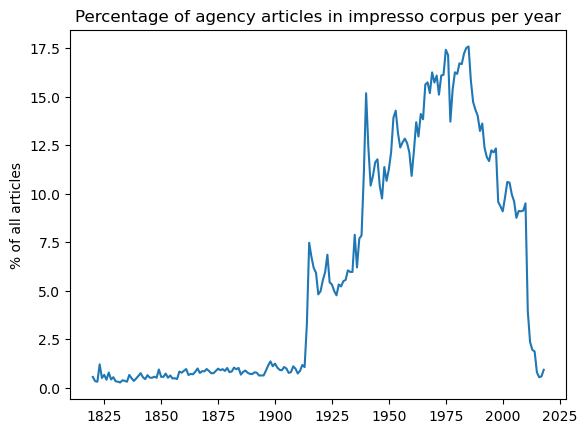

In [58]:
stats_per_year = na_per_year1820.merge(all_impresso_art_page1820.rename(columns={'count': 'count_impresso'}), on='year')
stats_per_year['perc'] = stats_per_year['count'] / stats_per_year['count_impresso'] * 100

plt.plot(list(range(1820, 2019)), stats_per_year['perc'])
plt.ylabel('% of all articles')
plt.title('Percentage of agency articles in impresso corpus per year')
plt.show()

In [59]:
stats_per_year[stats_per_year['year'].isin(list(range(1930, 1960)))]

,year,count,count_impresso,perc
110,1930,10221,185986,5.495575
111,1931,10419,187431,5.558846
112,1932,11528,190452,6.052969
113,1933,11628,194598,5.975395
114,1934,12011,201201,5.969652
115,1935,15968,202483,7.886094
116,1936,12345,199082,6.200962
117,1937,16848,219369,7.680210
118,1938,17551,223346,7.858211
119,1939,23529,213707,11.009934


<AxesSubplot: title={'center': '#articles per newspaper'}, xlabel='newspaper'>

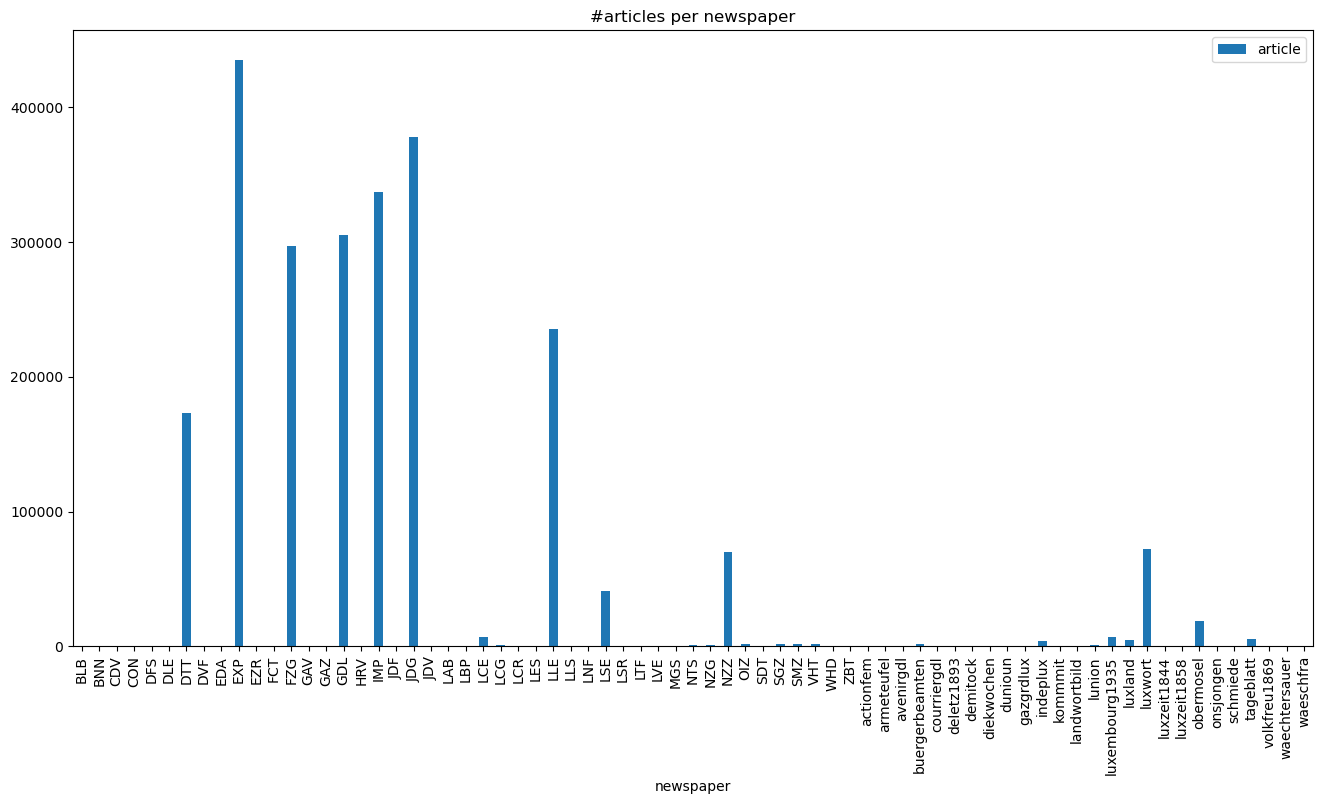

In [17]:
articles[['article', 'newspaper']].groupby('newspaper').count().plot.bar(figsize=(16,8), title="#articles per newspaper")

In [18]:
articles['newspaper'].value_counts()

EXP             435581
JDG             378324
IMP             337433
GDL             304975
FZG             296785
                 ...  
actionfem            3
landwortbild         3
JDV                  2
LSR                  1
kommmit              1
Name: newspaper, Length: 71, dtype: int64

<AxesSubplot: title={'center': '#mentions per agency'}, xlabel='agency'>

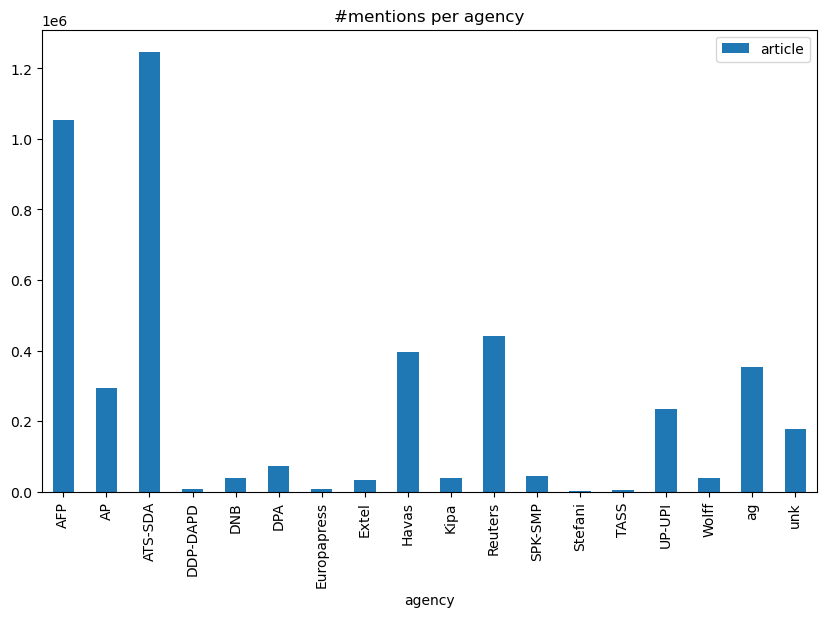

In [19]:
mentions_all[['article', 'agency']].groupby('agency').count().plot.bar(figsize=(10,6), title="#mentions per agency")

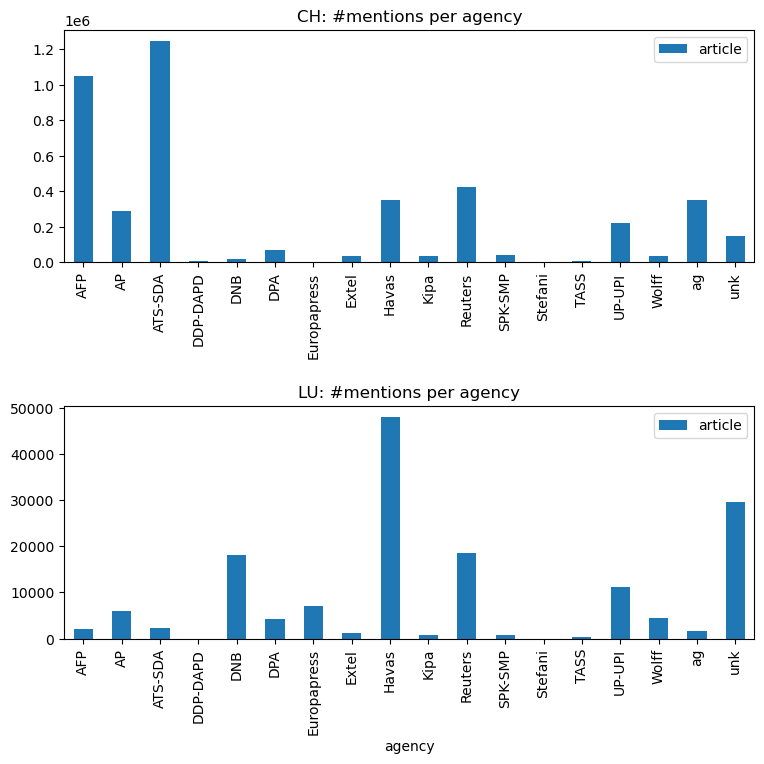

In [20]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
mentions_ch[['article', 'agency']].groupby('agency').count().plot.bar(title="CH: #mentions per agency", ax=ax1)
mentions_lu[['article', 'agency']].groupby('agency').count().plot.bar(title="LU: #mentions per agency", ax=ax2)
ax1.set_xlabel("")
fig.tight_layout(pad=2.0)
plt.show()

## Development over Time

In [21]:
#specifying colors for agencies
agencies = sorted(mentions_all['agency'].unique())
colors = plt.cm.tab20
clist = [colors(i) for i in range(colors.N)]
custom_cmap = dict(zip(agencies, clist[:len(agencies)]))

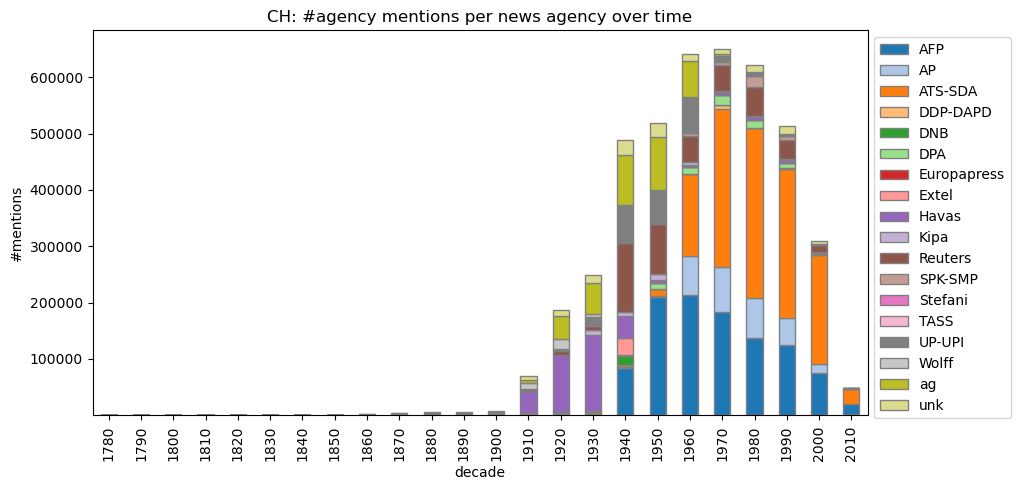

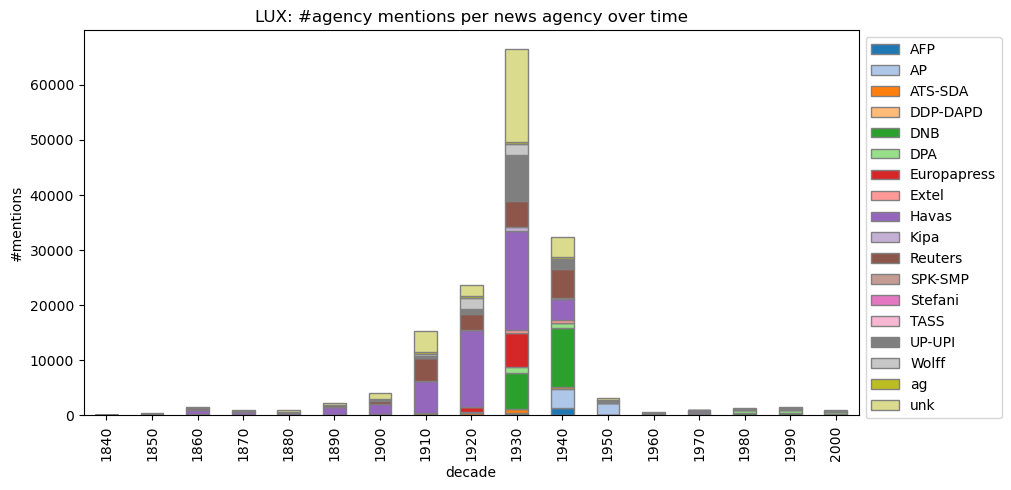

In [22]:
#Switzerland
na_per_decade_ch = pd.pivot_table(mentions_ch, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_ch.plot(kind="bar", stacked=True, figsize=(10,5), ylabel="#mentions", title="CH: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Luxembourg
na_per_decade_lux = pd.pivot_table(mentions_lu, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_lux.plot(kind="bar", stacked=True, figsize=(10,5), ylabel="#mentions", title="LUX: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Plot
plt.show()

In [23]:
def plot_ag_by_time_lang(orig_df, country, time_level="decade", intervals = relevant_decs):

    df = orig_df[orig_df['country'] == country]
    if country == "CH":
        full_country = "Switzerland"
    elif country == "LU":
        full_country = "Luxembourg"
    else:
        raise NameError("Use CH or LU for country")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), sharex=True)
    #French
    na_per_decade_fr = pd.pivot_table(df[(df['language'] == "fr") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_fr.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - FR: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax1)

    #German
    na_per_decade_de = pd.pivot_table(df[(df['language'] == "de") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_de.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - DE: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax2)

    #Plot
    fig.tight_layout(pad=4.0)
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1,0.5), loc="center left")
    ax1.xaxis.set_tick_params(labelbottom=True, rotation=90)
    plt.show()

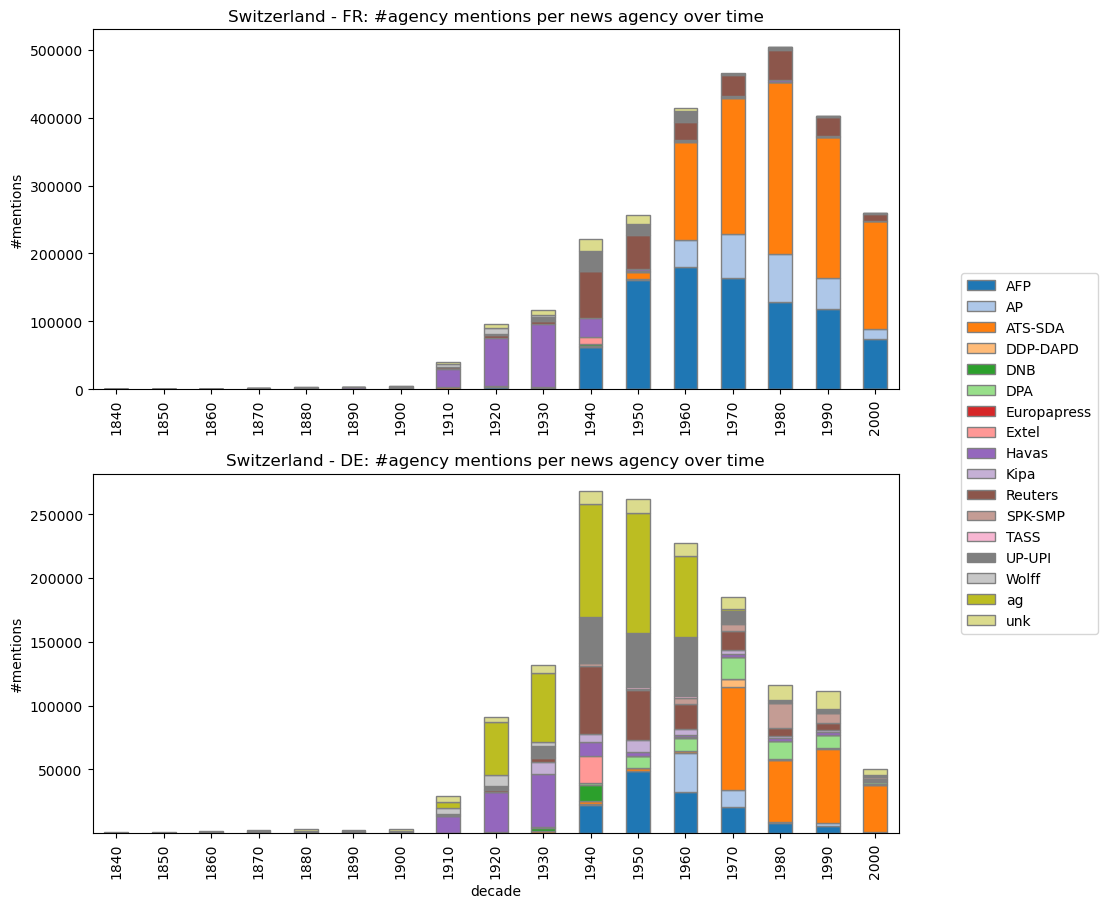

In [24]:
plot_ag_by_time_lang(mentions_ch, "CH")

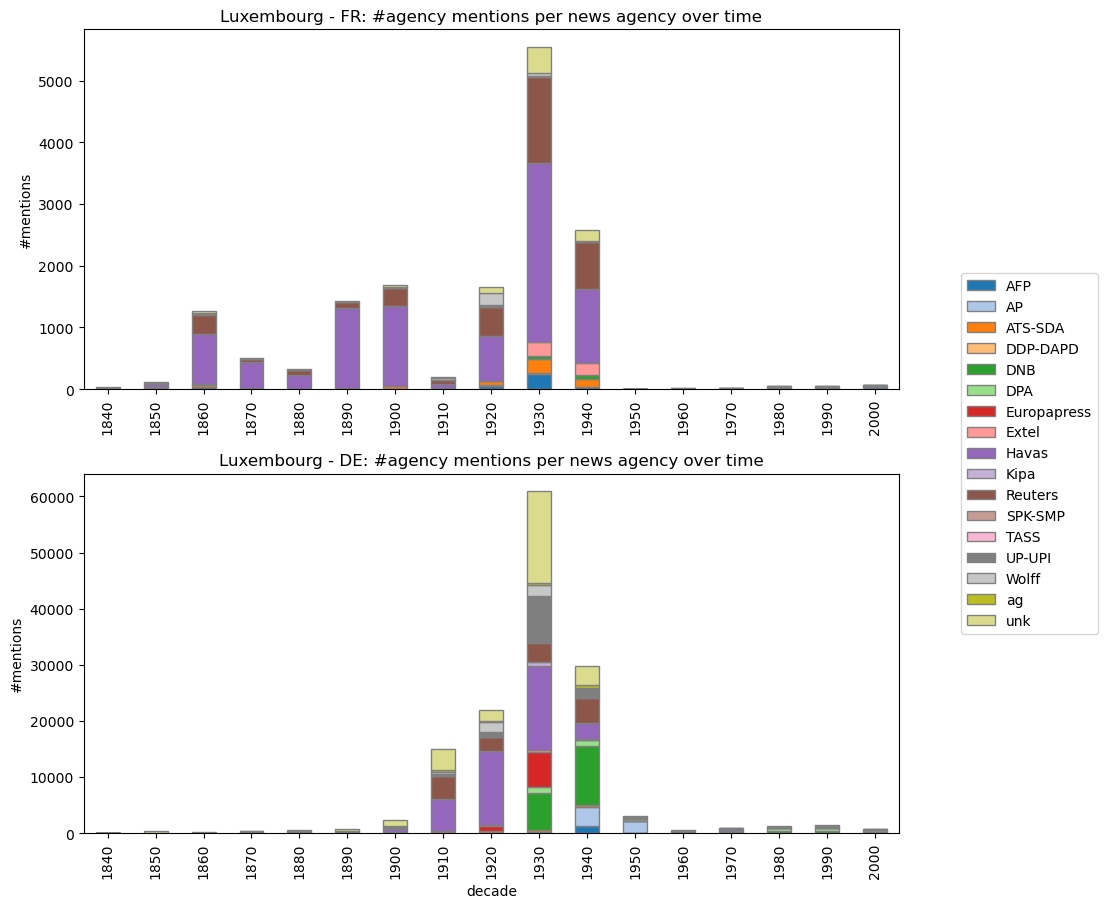

In [25]:
plot_ag_by_time_lang(mentions_lu, "LU")

### 1930s & 1940s 

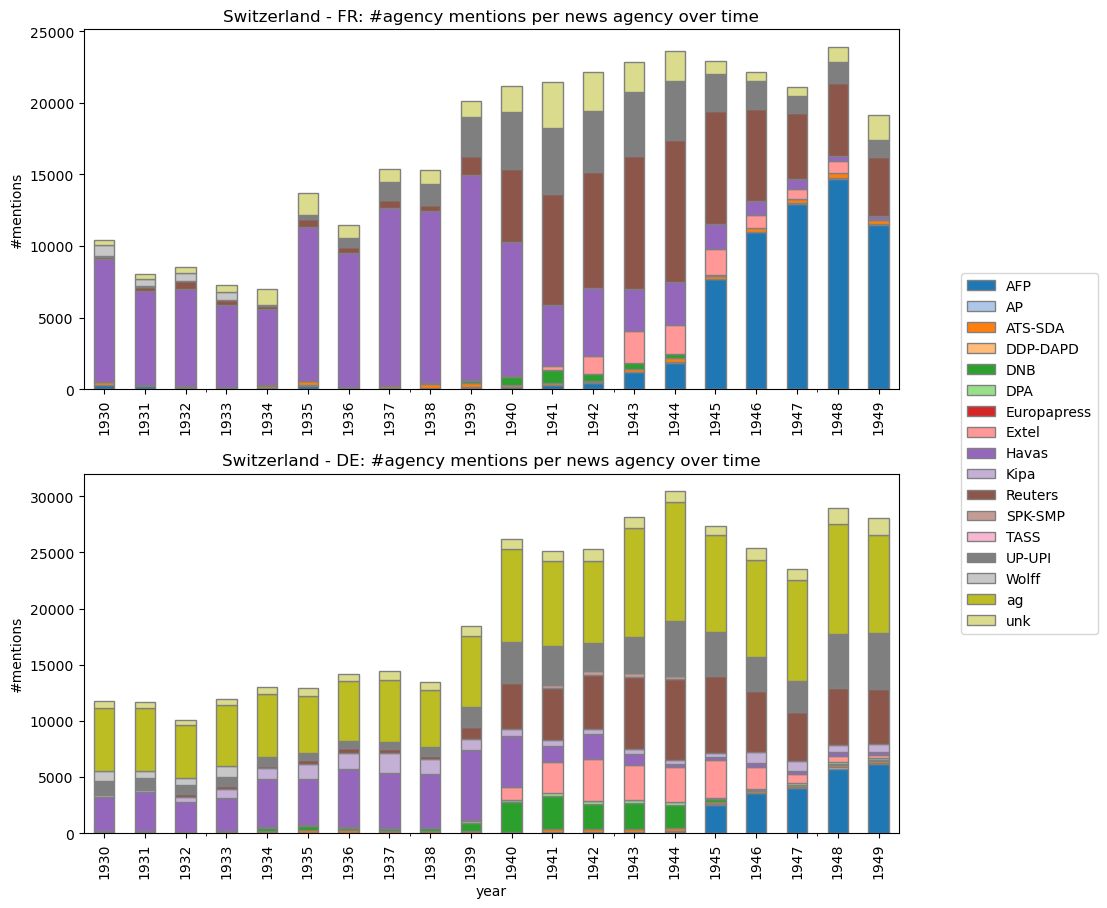

In [26]:
plot_ag_by_time_lang(mentions_ch, "CH", time_level="year", intervals=list(range(1930, 1950, 1)))

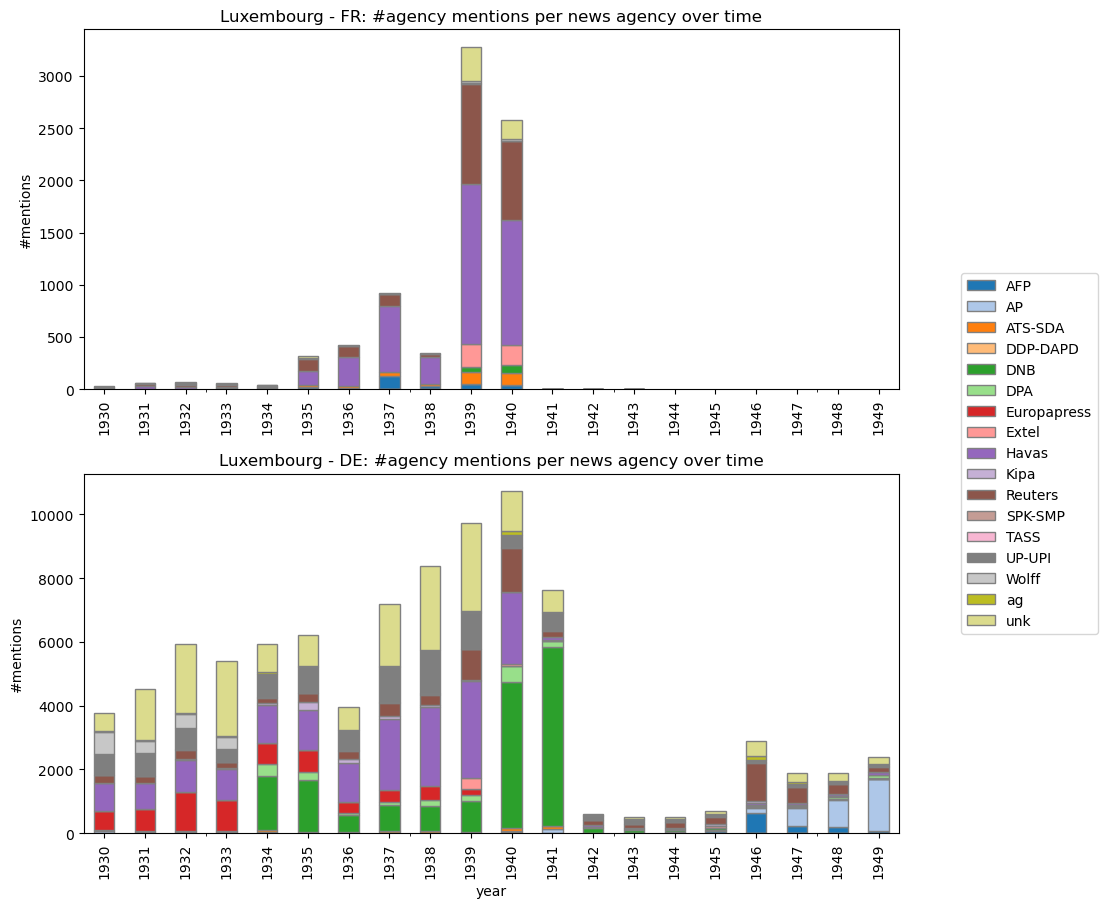

In [27]:
plot_ag_by_time_lang(mentions_lu, "LU", time_level="year", intervals=list(range(1930, 1950, 1)))

### Newspapers

In [28]:
def plot_np_over_time(df, np, cmap=custom_cmap):
    np_per_dec = pd.pivot_table(df[df['newspaper']==np], index="decade", columns="agency", values="article", aggfunc="count")

    np_per_dec.plot(kind="bar", stacked=True, figsize=(12,6), ylabel="#mentions", title=f"{np}: #agency mentions per news agency over time", color=cmap, edgecolor="grey")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

Most frequent Swiss newspapers:
FZG    849636
EXP    714307
JDG    575723
IMP    520793
GDL    472375
Name: newspaper, dtype: int64


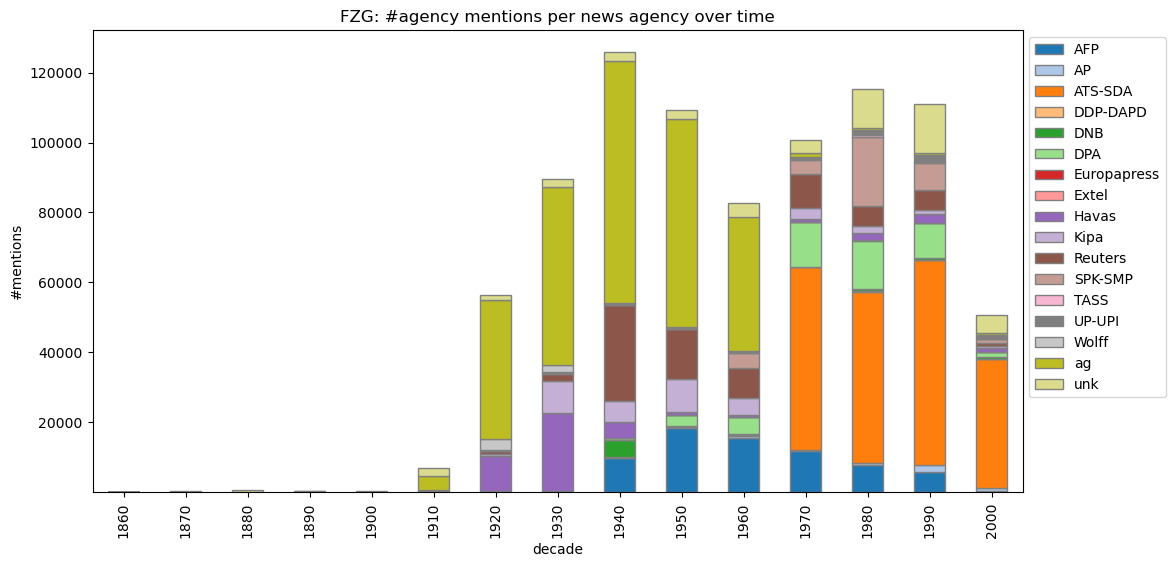

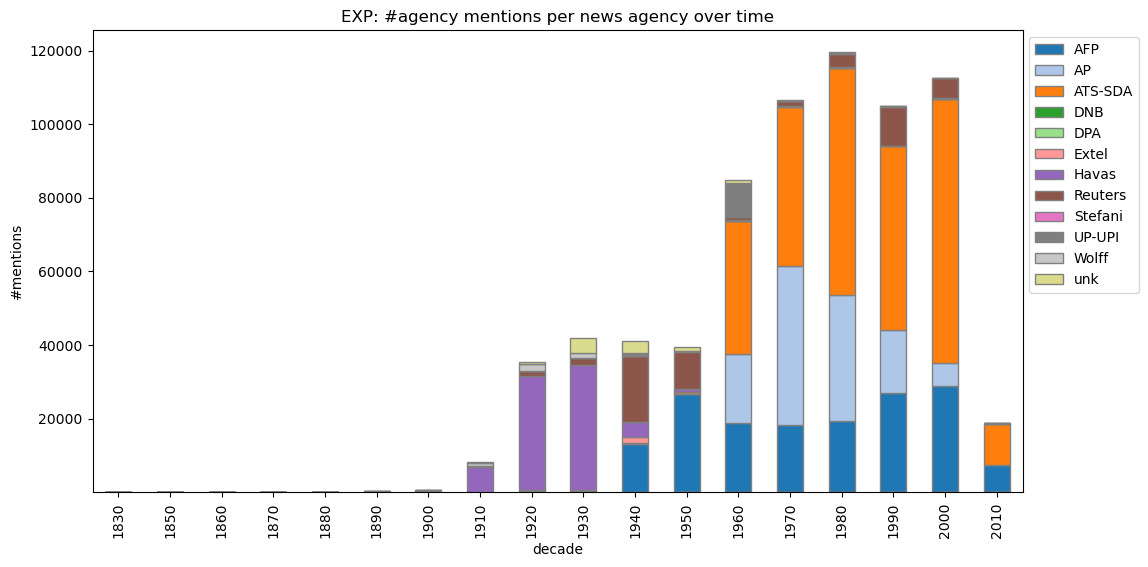

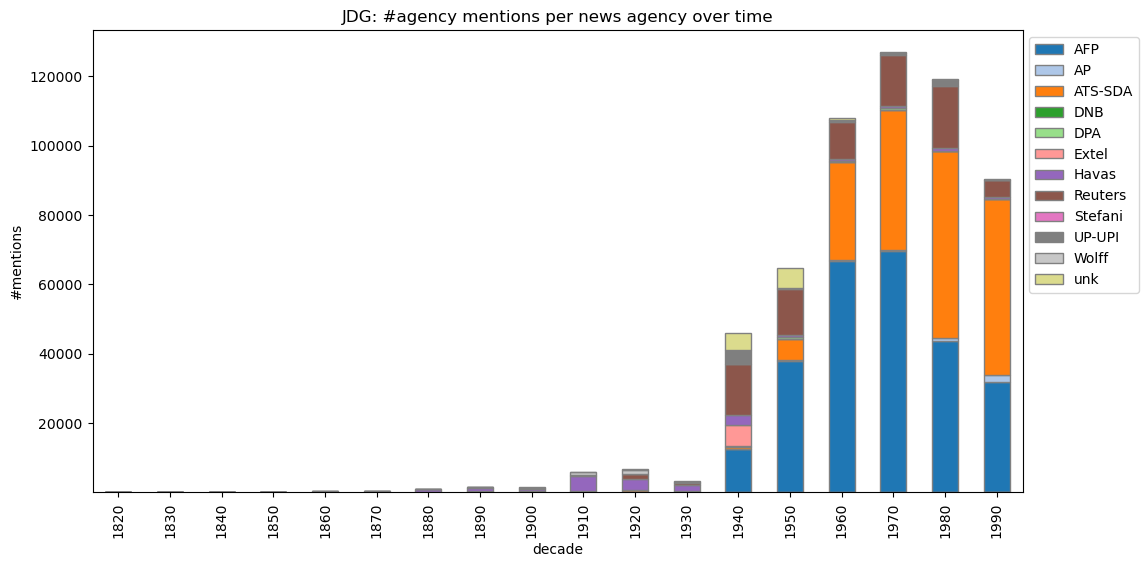

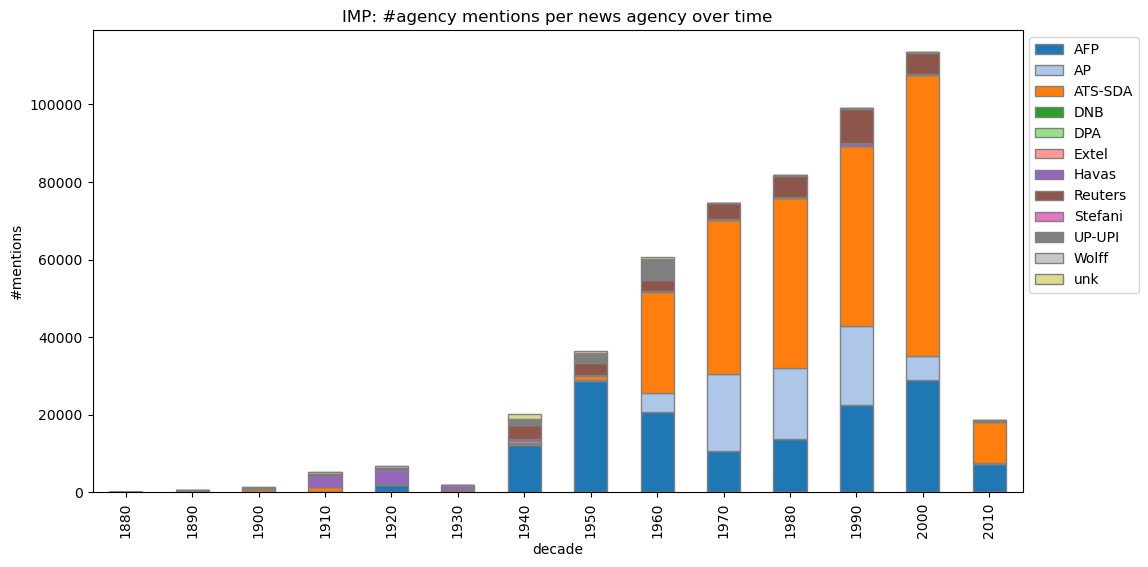

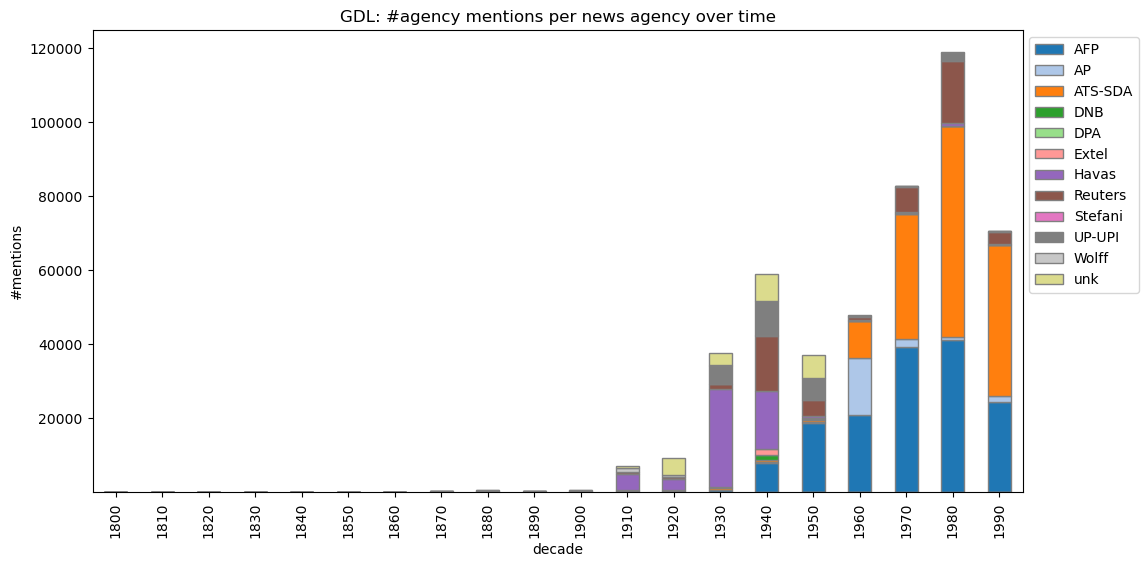

In [29]:
#Swiss Newspapers
freq_np_CH = mentions_all.loc[mentions_all['country']=="CH", 'newspaper'].value_counts()[:5]
print(f"Most frequent Swiss newspapers:\n{freq_np_CH}")

for newspaper in freq_np_CH.index:
    plot_np_over_time(mentions_all, newspaper)

plt.show()

Most frequent Luxembourgish newspapers:
luxwort           102573
obermosel          22413
luxembourg1935      7874
tageblatt           7458
indeplux            5457
Name: newspaper, dtype: int64


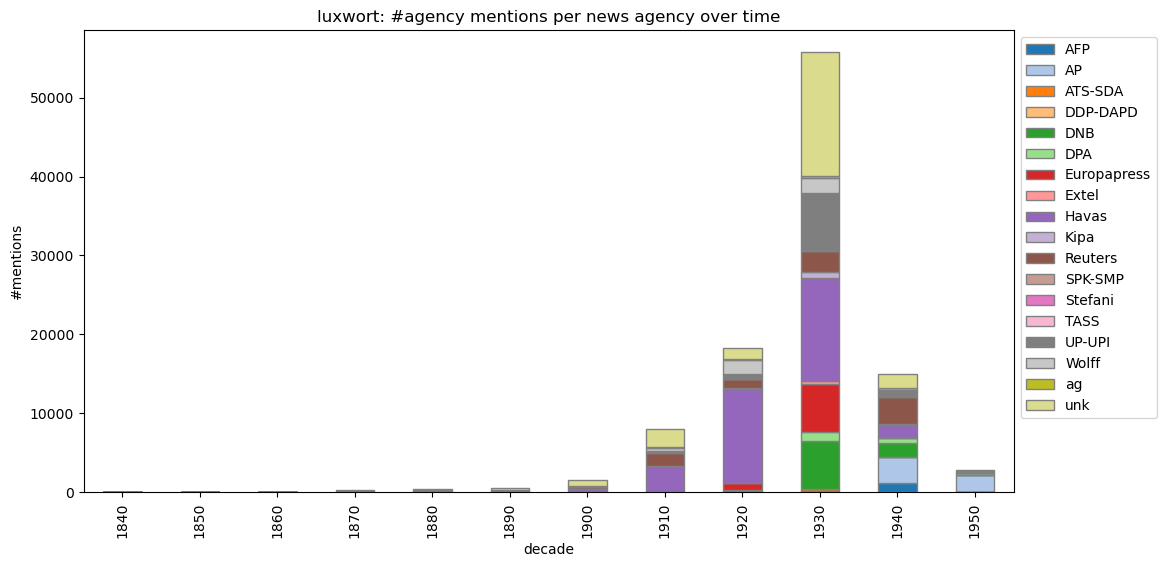

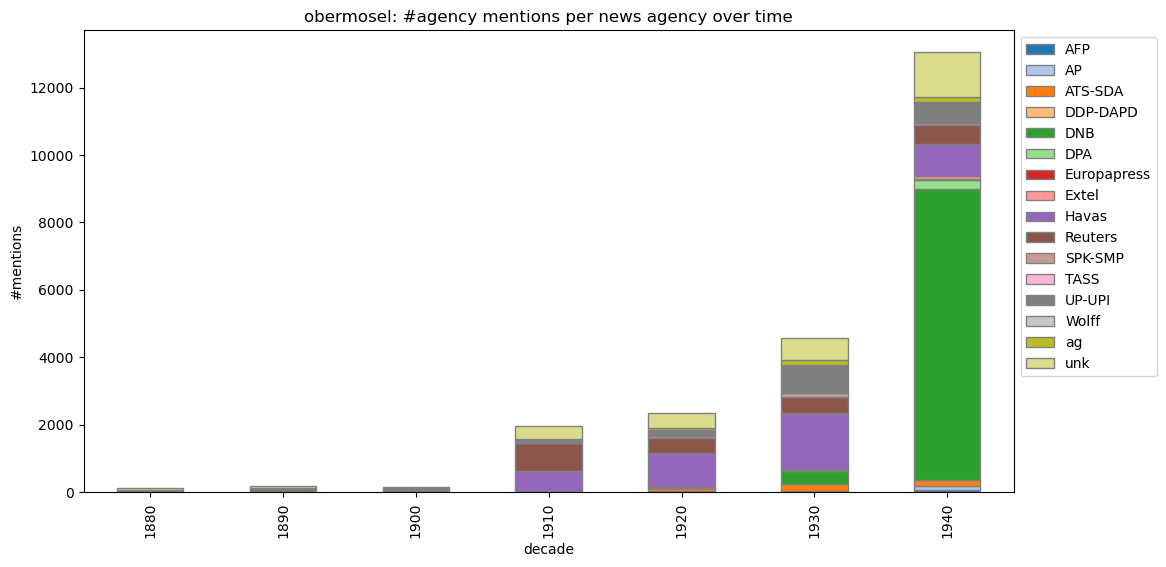

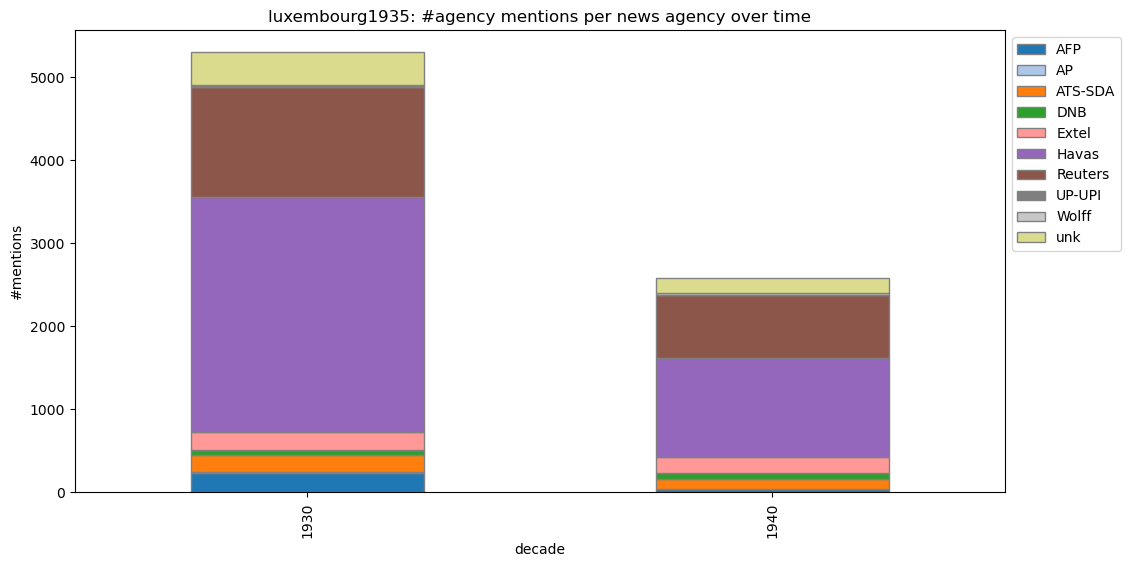

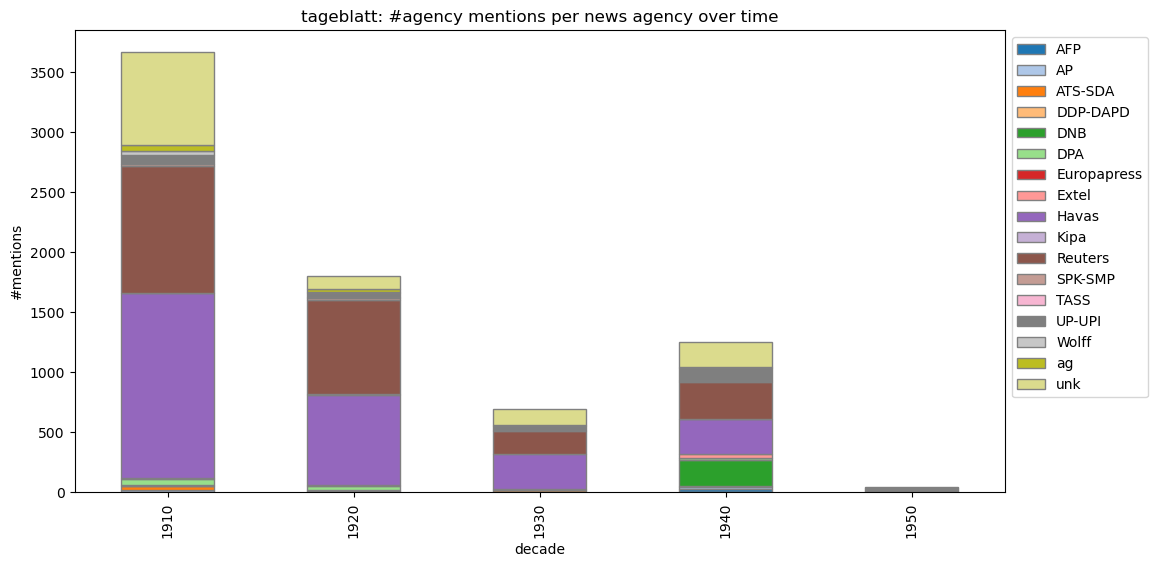

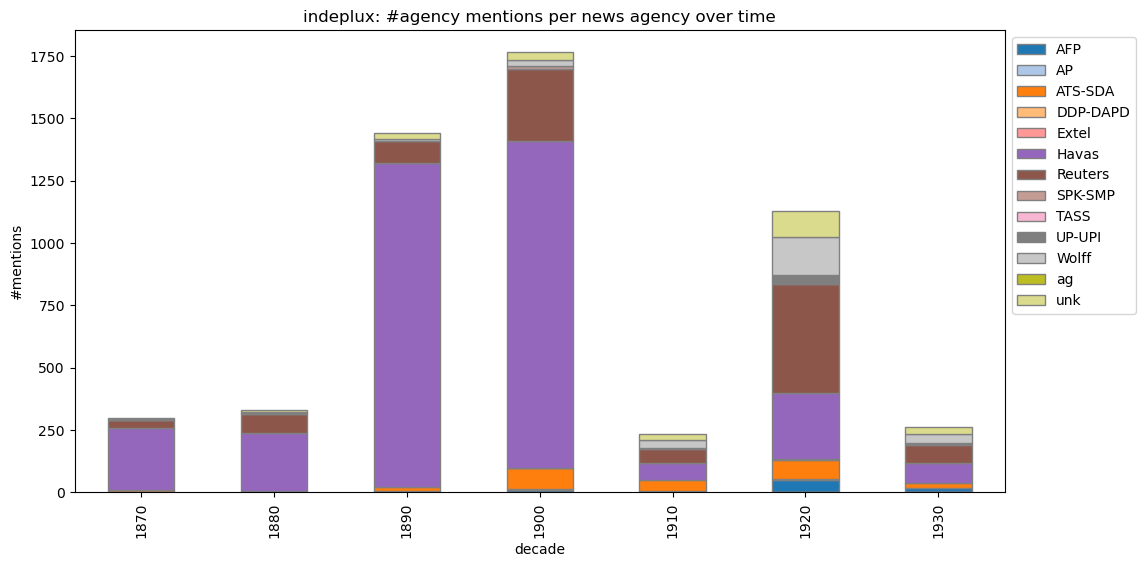

In [30]:
#Luxembourgish Newspapers
freq_np_LUX = mentions_all.loc[mentions_all['country']=="LU", 'newspaper'].value_counts()[:5]
print(f"Most frequent Luxembourgish newspapers:\n{freq_np_LUX}")

for newspaper in freq_np_LUX.index:
    plot_np_over_time(mentions_all, newspaper)

plt.show()

## Multiple Agency Mentions per Article

In [31]:
multiple_ag = mentions_all.groupby(['article', 'sentence_idx:']).agg({
    'agency': list,
    'surface': list,
    'id': list,
    'lSentenceOffset': list,
    'language': 'first',
    'newspaper': 'first',
    'year': 'first',
    'decade': 'first',
}).reset_index()
#only save entries with multiple agencies per sentence
multiple_ag = multiple_ag[multiple_ag['agency'].str.len() > 2]
multiple_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
813,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
3207,DTT-1939-12-23-a-i0002,35,"[UP-UPI, UP-UPI, UP-UPI]","[United Preß, United Preß, United Preß]",[DTT-1939-12-23-a-i0002:35:2:13:3998:4009:news...,"[2, 2, 2]",de,DTT,1939,1930
3917,DTT-1940-01-19-a-i0009,1,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-19-a-i0009:1:-1:2:40:43:newsag:be...,"[-1, 22, 30]",de,DTT,1940,1940
3942,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
4118,DTT-1940-01-29-a-i0007,28,"[ag, Reuters, Havas]","[ag., Reuter, Havas]",[DTT-1940-01-29-a-i0007:28:-1:2:4222:4225:news...,"[-1, 247, 394]",de,DTT,1940,1940


In [32]:
multiple_ag['agency'].value_counts()[:50]

[ATS-SDA, AFP, Reuters]             15678
[ATS-SDA, Reuters, AFP]              2295
[ATS-SDA, DPA, AFP]                  1543
[ATS-SDA, DPA, Reuters]              1373
[ATS-SDA, AFP, DPA]                  1238
[ATS-SDA, AFP, DPA, Reuters]         1146
[ATS-SDA, AFP, AP]                   1019
[AFP, AFP, AFP]                       951
[ATS-SDA, DPA, AFP, Reuters]          882
[ATS-SDA, Reuters, DPA]               832
[ATS-SDA, DPA, Reuters, AFP]          788
[ATS-SDA, ATS-SDA, ATS-SDA]           681
[ATS-SDA, Reuters, DPA, AFP]          648
[ATS-SDA, Reuters, AFP, DPA]          557
[ATS-SDA, AFP, Reuters, DPA]          462
[ATS-SDA, ATS-SDA, AFP]               420
[AFP, AFP, AFP, AFP]                  415
[AP, ATS-SDA, AFP]                    407
[ATS-SDA, AFP, ATS-SDA]               385
[AFP, Reuters, AP]                    369
[ATS-SDA, ATS-SDA, Reuters]           350
[AP, AFP, Reuters]                    255
[ATS-SDA, AFP, Reuters, AP]           203
[ag, Havas, ag, Havas]            

-> question if sentence segmentation is good enough

In [33]:
multiple_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
813,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
3207,DTT-1939-12-23-a-i0002,35,"[UP-UPI, UP-UPI, UP-UPI]","[United Preß, United Preß, United Preß]",[DTT-1939-12-23-a-i0002:35:2:13:3998:4009:news...,"[2, 2, 2]",de,DTT,1939,1930
3917,DTT-1940-01-19-a-i0009,1,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-19-a-i0009:1:-1:2:40:43:newsag:be...,"[-1, 22, 30]",de,DTT,1940,1940
3942,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
4118,DTT-1940-01-29-a-i0007,28,"[ag, Reuters, Havas]","[ag., Reuter, Havas]",[DTT-1940-01-29-a-i0007:28:-1:2:4222:4225:news...,"[-1, 247, 394]",de,DTT,1940,1940


In [34]:
len(multiple_ag)

42684

In [35]:
def get_ag_in_same_sent(row, distance=30):
    loffset = row['lSentenceOffset']
    #pair each offset with the next one
    paired_offsets = zip(loffset[:-1], loffset[1:])

    same_sent_pos = set()
    for pos, pair in enumerate(paired_offsets):
        if abs(pair[1] - pair[0]) <= distance:
            #save position in original list
            same_sent_pos.add(pos)
            same_sent_pos.add(pos + 1)

    return sorted(list(same_sent_pos))

In [36]:
mult_close_ag = multiple_ag.copy()
len_multiple_before = len(mult_close_ag)
print(f"#Sentences (df rows) before deletion of mentions which are too far apart: {len_multiple_before}")

#get all entries which are close to each other in one sentence
mult_close_ag['close_entries_pos'] = mult_close_ag.apply(get_ag_in_same_sent, axis=1)

#delete all sentences/df rows where no mention close to one another
mult_close_ag = mult_close_ag[mult_close_ag['close_entries_pos'].str.len() > 0]
print(f"Interim: #Sentences with no two mentions close to each other: {len_multiple_before - len(mult_close_ag)}")

#delete all mentions which are not close to one another
for col in ['agency', 'surface', 'id', 'lSentenceOffset']:
    mult_close_ag[col] = mult_close_ag.apply(lambda x: [x[col][i] for i in x['close_entries_pos']], axis=1)

print(f"#Sentences (df rows) after deletion of mentions which are too far apart: {len(mult_close_ag)} (deleted rows: {len_multiple_before - len(mult_close_ag)})")
mult_close_ag = mult_close_ag.drop(columns='close_entries_pos')

#Sentences (df rows) before deletion of mentions which are too far apart: 42684


Interim: #Sentences with no two mentions close to each other: 1958
#Sentences (df rows) after deletion of mentions which are too far apart: 40726 (deleted rows: 1958)


In [37]:
mult_close_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
813,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
3207,DTT-1939-12-23-a-i0002,35,"[UP-UPI, UP-UPI, UP-UPI]","[United Preß, United Preß, United Preß]",[DTT-1939-12-23-a-i0002:35:2:13:3998:4009:news...,"[2, 2, 2]",de,DTT,1939,1930
3917,DTT-1940-01-19-a-i0009,1,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-19-a-i0009:1:-1:2:40:43:newsag:be...,"[-1, 22, 30]",de,DTT,1940,1940
3942,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
4496,DTT-1940-02-12-a-i0004,85,"[ag, Havas, Havas]","[ag., Agentur, Havas]",[DTT-1940-02-12-a-i0004:85:-1:2:8645:8648:news...,"[-1, 23, 31]",de,DTT,1940,1940


In [38]:
mult_close_ag['agency'].value_counts()

[ATS-SDA, AFP, Reuters]                      15239
[ATS-SDA, Reuters, AFP]                       2261
[ATS-SDA, DPA, AFP]                           1544
[ATS-SDA, DPA, Reuters]                       1384
[ATS-SDA, AFP, DPA]                           1232
                                             ...  
[Extel, DPA, AFP]                                1
[ATS-SDA, Reuters, unk, Reuters, Reuters]        1
[Havas, DPA, AFP]                                1
[unk, ATS-SDA, Reuters, DPA, AFP]                1
[Reuters, unk, Havas]                            1
Name: agency, Length: 1033, dtype: int64

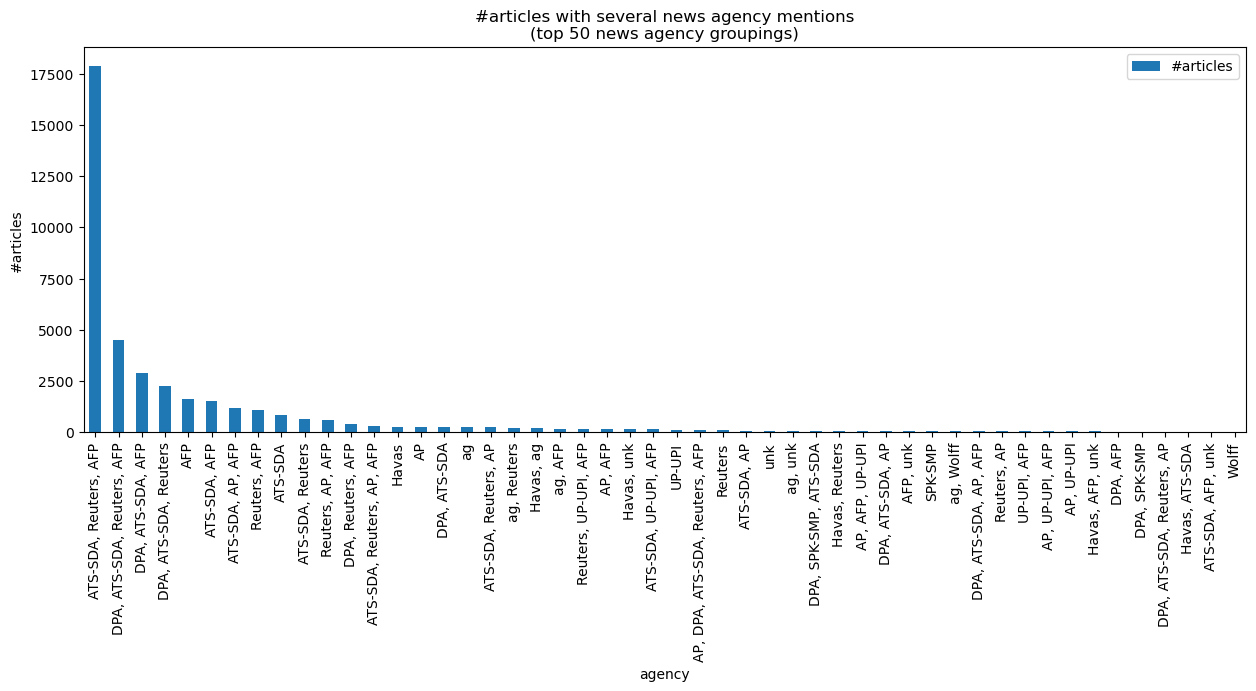

In [39]:
na_mult_grouped = mult_close_ag.copy()[['id', 'agency']]
na_mult_grouped['agency'] = na_mult_grouped['agency'].apply(lambda x: ", ".join(set(x)))
na_mult_grouped = na_mult_grouped.groupby("agency").count().rename({"id":"#articles"}, axis=1)
na_mult_grouped.nlargest(50, "#articles").plot(kind="bar", ylabel="#articles", title="#articles with several news agency mentions\n(top 50 news agency groupings)", figsize=(15,5))
plt.show()

In [40]:
mult_close_ag['newspaper'].value_counts()

FZG               14278
IMP               12957
EXP                7741
JDG                1740
GDL                1648
LLE                 928
DTT                 724
NZZ                 477
luxwort              69
obermosel            49
LSE                  30
tageblatt            20
LCE                  18
indeplux             11
buergerbeamten        7
luxembourg1935        6
luxland               5
LLS                   4
LCR                   3
VHT                   3
LES                   1
courriergdl           1
SMZ                   1
lunion                1
SDT                   1
OIZ                   1
GAV                   1
LTF                   1
Name: newspaper, dtype: int64

In [41]:
articles['newspaper'].value_counts()

EXP             435581
JDG             378324
IMP             337433
GDL             304975
FZG             296785
                 ...  
actionfem            3
landwortbild         3
JDV                  2
LSR                  1
kommmit              1
Name: newspaper, Length: 71, dtype: int64

## Save dataframes

In [42]:
pd.to_pickle(articles_fr, output_path + "articles_fr.pkl")
pd.to_pickle(articles_de, output_path + "articles_de.pkl")
pd.to_pickle(mentions_fr, output_path + "mentions_fr.pkl")
pd.to_pickle(mentions_de, output_path + "mentions_de.pkl")